# 03 - Multi-variable Linear Regression

<img width="200" src="https://i.imgur.com/hbPVe1T.png">


In [1]:
import tensorflow as tf
import numpy as np

tf.enable_eager_execution()

tf.__version__

'1.12.0'

# Hypothesis and Cost

$$ H(x) = Wx + b $$ 

$$ cost(W, b)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (H{ x }^{ i }-y^{ i } })^{ 2 } }  $$

# Simplifed hypothesis

$$ H(x) = Wx $$ 

$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$



b를 W 행렬에 넣어 표현할 수 있기 때문에 생략 가능

# Cost function
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

W = -1, cost(W) = 18.67
$$ cost(W)=\frac { 1 }{ 3 } ( (-1 * 1 - 1)^2 + (-1 * 2 - 2)^2 + (-1 * 3 - 3)^2) $$

W = 0, cost(W) = 4.67
$$ cost(W)=\frac { 1 }{ 3 } ( (0 * 1 - 1)^2 + (0 * 2 - 2)^2 + (0 * 3 - 3)^2) $$

W = 1, cost(W) = 0
$$ cost(W)=\frac { 1 }{ 3 } ( (1 * 1 - 1)^2 + (1 * 2 - 2)^2 + (1 * 3 - 3)^2) $$

W = 2, cost(W) = 4.67
$$ cost(W)=\frac { 1 }{ 3 } ( (2 * 1 - 1)^2 + (2 * 2 - 2)^2 + (2 * 3 - 3)^2) $$


# Cost function in pure Python

In [12]:
import numpy as np

X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
    c = 0
    for i in range(len(X)):
        c += (W * X[i] - Y[i]) ** 2
    return c / len(X)

for feed_W in np.linspace(-3, 5, num=15):
    curr_cost = cost_func(feed_W, X, Y)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


# Cost function in TensorFlow

In [13]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
  hypothesis = X * W
  return tf.reduce_mean(tf.square(hypothesis - Y))

W_values = np.linspace(-3, 5, num=15)
cost_values = []

for feed_W in W_values:
    curr_cost = cost_func(feed_W, X, Y)
    cost_values.append(curr_cost)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


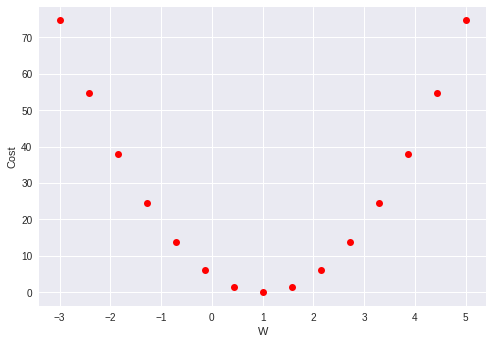

In [14]:
import matplotlib.pyplot as plt

plt.plot(W_values, cost_values, "ro")
plt.ylabel('Cost')
plt.xlabel('W')
plt.show()

# How to minimize cost?
* 현재 데이터 X와 Y에 대해 W가 1일 때 cost 가 가장 작다
* cost 가 최소가 되는 W를 어떻게 찾을 수 있을까?

# Gradient descent algorithm
* Minimize cost function
* used many minimization problems
* For a given cost (W, b), it will find W, b to minimize cost
* It can be applied to more general function: cost (w1, w2, ...)

# How does it work?
* Start with initial guesses
 * Start at 0,0 (or any other value)
 * Keeping changing $W$ and $b$ a little bit to try and reduce $cost(W,b)$
* Each time you change the parameters, you select the gradient which reduces $cost(W,b)$ the most possible 
* Repeat
* Do so until you converge to a local minimum
* Has an interesting property
 * Where you start can determine which minimum you end up

http://www.holehouse.org/mlclass/01_02_Introduction_regression_analysis_and_gr.html

# Formal definition
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

$$ \Downarrow $$

$$ cost(W)=\frac { 1 }{ 2m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

* m 혹은 2m 나누는 것이 cost 최소화에 영향 없음
* 제곱을 미분할 때, 2가 앞으로 나오면서 공식이 단순하게 되는 효과

# Formal definition
$$ cost(W)=\frac { 1 }{ 2m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

$$ W:=W - \alpha\frac{ \partial } {\partial W } cost(W) $$

* W = W - 변화량
* 변화량 = 현 위치(W)에서 비용곡선의 기울기(=미분값) X $\alpha$ <br> $\alpha$ : learning rate (시도 간격)

# Formal definition

$$ W:=W - \alpha\frac{ \partial } {\partial W } \frac { 1 }{ 2m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } } $$

$$ W:=W-\alpha \frac { 1 }{ 2m } \sum _{ i=1 }^{ m }{ { 2(W{ x }^{ i }-y^{ i } })x^{ i } }  $$

$$ W:=W-\alpha \frac { 1 }{ m } \sum _{ i=1 }^{ m }{ { (W{ x }^{ i }-y^{ i } })x^{ i } }  $$



# Gradient descent algorithm
$$ W:=W-\alpha \frac { 1 }{ m } \sum _{ i=1 }^{ m }{ { (W{ x }^{ i }-y^{ i } })x^{ i } }  $$

# Convex function
<img width="40%" src="http://i.imgur.com/TSKliup.png" >
<img width="40%" src="http://i.imgur.com/GyCwshy.png" >

Gradient descent algorithm을 사용하려면, 비용함수 cost(W,b)가 Convex function 이어야 한다

http://www.holehouse.org/mlclass/01_02_Introduction_regression_analysis_and_gr.html

# Gradient descent 구현

In [0]:
tf.set_random_seed(0)  # for reproducibility

In [16]:
x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable(tf.random_normal([1], -100., 100.))

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
    mean = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(0.01, mean)
    W.assign(descent)
    
    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.4f} | {:10.6} | {:10.6}'.format(
            step, mean.numpy(), cost.numpy(), W.numpy()[0], descent.numpy()[0]))
        
print('-' * 80)
print(5.0 * W)
print(2.5 * W)

    0 |   233.8292 | 11716.3086 |     48.768 |     48.768
   10 |   144.9928 |  4504.9126 |      30.62 |      30.62
   20 |    89.9072 |  1732.1364 |    19.3668 |    19.3668
   30 |    55.7497 |   666.0052 |    12.3889 |    12.3889
   40 |    34.5693 |   256.0785 |      8.062 |      8.062
   50 |    21.4357 |    98.4620 |    5.37901 |    5.37901
   60 |    13.2919 |    37.8586 |    3.71534 |    3.71534
   70 |     8.2420 |    14.5566 |    2.68373 |    2.68373
   80 |     5.1107 |     5.5970 |    2.04404 |    2.04404
   90 |     3.1690 |     2.1520 |    1.64739 |    1.64739
  100 |     1.9651 |     0.8275 |    1.40143 |    1.40143
  110 |     1.2185 |     0.3182 |    1.24892 |    1.24892
  120 |     0.7556 |     0.1223 |    1.15435 |    1.15435
  130 |     0.4685 |     0.0470 |    1.09571 |    1.09571
  140 |     0.2905 |     0.0181 |    1.05935 |    1.05935
  150 |     0.1801 |     0.0070 |     1.0368 |     1.0368
  160 |     0.1117 |     0.0027 |    1.02282 |    1.02282
  170 |     0.

# Liner regression Summary

## 1) Hypothesis 

$$ H(x) = Wx + b $$

## 2) Cost function

$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

## 3) Gradient descent

$$ W := W-\alpha \frac { \partial  }{ \partial W } cost(W) $$

# Multi-variable linear regression
Predicting exam score - regression using three inputs (x1, x2, x3)

x1 (quiz 1) | x2 (quiz 2) | x3 (mid 1) | Y (final)
---- | ---- | ----| ----
73 | 80 | 75 | 152
93 | 88 | 93 | 185
89 | 91 | 90 | 180
96 | 98 | 100 | 196
73 | 66 | 70 | 142


Test Scores for General Psychology ( https://goo.gl/g2T8Kp )

# Matrix multiplication

## dot product(=scalar product, 내적)
<img src="https://www.mathsisfun.com/algebra/images/matrix-multiply-a.svg" >


https://www.mathsisfun.com/algebra/matrix-multiplying.html

# Multi-feature regression

### Hypothesis

$$ H(x) = w x + b $$

$$ H(x_1, x_2, x_3) = w_1 x_1 + w_2 x_2 + w_3 x_3 + b $$

# Hypothesis using matrix

$$ H(x_1, x_2, x_3) = \underline{w_1 x_1 + w_2 x_2 + w_3 x_3} + b $$

$$ w_1 x_1 + w_2 x_2 + w_3 x_3 $$ 

$$ \begin{pmatrix} w_{ 1 } & w_{ 2 } & w_{ 3 } \end{pmatrix}\cdot \begin{pmatrix} x_{ 1 } \\ x_{ 2 } \\ x_{ 3 } \end{pmatrix} $$

$$ WX $$ (W, X 는 matrix)

# Hypothesis without b

$$ H(x_1, x_2, x_3) = w_1 x_1 + w_2 x_2 + w_3 x_3 + b$$

$$ = b + w_1 x_1 + w_2 x_2 + w_3 x_3 $$

$$ = \begin{pmatrix} b & x_{ 1 } & x_{ 2 } & x_{ 3 } \end{pmatrix}\cdot \begin{pmatrix} 1 \\ w_{ 1 } \\ w_{ 2 } \\ w_{ 3 } \end{pmatrix} $$

$$ = XW $$



# Hypothesis using matrix 

### Many x instances

$$ \begin{pmatrix} x_{ 11 } & x_{ 12 } & x_{ 13 } \\ x_{ 21 } & x_{ 22 } & x_{ 23 } \\ x_{ 31 } & x_{ 32 } & x_{ 33 }\\ x_{ 41 } & x_{ 42 } & x_{ 43 }\\ x_{ 51 } & x_{ 52 } & x_{ 53 }\end{pmatrix} \cdot \begin{pmatrix} w_{ 1 } \\ w_{ 2 } \\ w_{ 3 } \end{pmatrix}=\begin{pmatrix} x_{ 11 }w_{ 1 }+x_{ 12 }w_{ 2 }+x_{ 13 }w_{ 3 } \\ x_{ 21 }w_{ 1 }+x_{ 22 }w_{ 2 }+x_{ 23 }w_{ 3 }\\ x_{ 31 }w_{ 1 }+x_{ 32 }w_{ 2 }+x_{ 33 }w_{ 3 } \\ x_{ 41 }w_{ 1 }+x_{ 42 }w_{ 2 }+x_{ 43 }w_{ 3 } \\ x_{ 51 }w_{ 1 }+x_{ 52 }w_{ 2 }+x_{ 53 }w_{ 3 } \end{pmatrix} $$

$$ [5, 3] \cdot [3, 1] = [5, 1] $$

$$ H(X) = XW $$

5는 데이터(instance)의 수, 3은 변수(feature)의 수, 1은 결과

# Hypothesis using matrix (n output)

$$ [n, 3] \cdot [?, ?] = [n, 2] $$

$$ H(X) = XW $$

* n은 데이터(instance)의 개수, 2는 결과 값의 개수로 주어진다.
* 이때, W [?, ?] ⇒ [3, 2]

# WX vs XW

### Theory (Lecture) :
 $$ H(x) = Wx + b  $$

### TensorFlow (Implementation) :

$$ H(X) = XW $$

# Simple Example (2 variables)

x1 | x2 | y
---- | ---- | ----
1  |  0  |  1
0  |  2  |  2
3  |  0  |  3
0  |  4  |  4
5  |  0  |  5

In [17]:
x1_data = [1, 0, 3, 0, 5]
x2_data = [0, 2, 0, 4, 0]
y_data  = [1, 2, 3, 4, 5]

W1 = tf.Variable(tf.random_uniform([1], -10.0, 10.0))
W2 = tf.Variable(tf.random_uniform([1], -10.0, 10.0))
b  = tf.Variable(tf.random_uniform([1], -10.0, 10.0))

learning_rate = tf.Variable(0.1)

for i in range(400+1):
    with tf.GradientTape() as tape:
        hypothesis = W1 * x1_data + W2 * x2_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W1_grad, W2_grad, b_grad = tape.gradient(cost, [W1, W2, b])
    W1.assign_sub(learning_rate * W1_grad)
    W2.assign_sub(learning_rate * W2_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 20 == 0:
      print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.6f}".format(
          i, cost.numpy(), W1.numpy()[0], W2.numpy()[0], b.numpy()[0]))


    0 | 351.808533 |     3.2957 |     1.1402 |  -3.533842
   20 |   0.704345 |     1.5070 |     1.6016 |  -1.928859
   40 |   0.203937 |     1.2728 |     1.3237 |  -1.037901
   60 |   0.059048 |     1.1468 |     1.1742 |  -0.558485
   80 |   0.017097 |     1.0790 |     1.0937 |  -0.300516
  100 |   0.004950 |     1.0425 |     1.0504 |  -0.161705
  120 |   0.001433 |     1.0229 |     1.0271 |  -0.087012
  140 |   0.000415 |     1.0123 |     1.0146 |  -0.046820
  160 |   0.000120 |     1.0066 |     1.0079 |  -0.025194
  180 |   0.000035 |     1.0036 |     1.0042 |  -0.013556
  200 |   0.000010 |     1.0019 |     1.0023 |  -0.007295
  220 |   0.000003 |     1.0010 |     1.0012 |  -0.003925
  240 |   0.000001 |     1.0006 |     1.0007 |  -0.002112
  260 |   0.000000 |     1.0003 |     1.0004 |  -0.001136
  280 |   0.000000 |     1.0002 |     1.0002 |  -0.000611
  300 |   0.000000 |     1.0001 |     1.0001 |  -0.000329
  320 |   0.000000 |     1.0000 |     1.0001 |  -0.000177
  340 |   0.00

# Simple Example (2 variables)

In [18]:
x_data = [
    [1., 0., 3., 0., 5.],
    [0., 2., 0., 4., 0.]
]
y_data  = [1, 2, 3, 4, 5]

W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

learning_rate = tf.Variable(0.1)

for i in range(400+1):
  with tf.GradientTape() as tape:
    hypothesis = tf.matmul(W, x_data) + b # (1, 2) * (2, 5) = (1, 5)
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

  W_grad, b_grad = tape.gradient(cost, [W, b])
  W.assign_sub(learning_rate * W_grad)
  b.assign_sub(learning_rate * b_grad)
    
  if i % 20 == 0:
    print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.6f}".format(
        i, cost.numpy(), W.numpy()[0][0], W.numpy()[0][1], b.numpy()[0]))

    0 |  42.813225 |     1.8631 |     0.6864 |   0.981426
   20 |   0.029272 |     0.8966 |     0.8774 |   0.393219
   40 |   0.008475 |     0.9444 |     0.9340 |   0.211587
   60 |   0.002454 |     0.9701 |     0.9645 |   0.113853
   80 |   0.000711 |     0.9839 |     0.9809 |   0.061263
  100 |   0.000206 |     0.9913 |     0.9897 |   0.032965
  120 |   0.000060 |     0.9953 |     0.9945 |   0.017738
  140 |   0.000017 |     0.9975 |     0.9970 |   0.009545
  160 |   0.000005 |     0.9986 |     0.9984 |   0.005136
  180 |   0.000001 |     0.9993 |     0.9991 |   0.002764
  200 |   0.000000 |     0.9996 |     0.9995 |   0.001487
  220 |   0.000000 |     0.9998 |     0.9998 |   0.000800
  240 |   0.000000 |     0.9999 |     0.9999 |   0.000431
  260 |   0.000000 |     0.9999 |     0.9999 |   0.000232
  280 |   0.000000 |     1.0000 |     1.0000 |   0.000125
  300 |   0.000000 |     1.0000 |     1.0000 |   0.000067
  320 |   0.000000 |     1.0000 |     1.0000 |   0.000036
  340 |   0.00

# Hypothesis without b

In [19]:
import tensorflow as tf

# 앞의 코드에서 bias(b)를 행렬에 추가
x_data = [
    [1., 1., 1., 1., 1.], # bias(b)
    [1., 0., 3., 0., 5.], 
    [0., 2., 0., 4., 0.]
]
y_data  = [1, 2, 3, 4, 5]

W = tf.Variable(tf.random_uniform([1, 3], -1.0, 1.0)) # [1, 3]으로 변경하고, b 삭제

learning_rate = 0.1
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

for i in range(400+1):
  with tf.GradientTape() as tape:
    hypothesis = tf.matmul(W, x_data) # b가 없다
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

  grads = tape.gradient(cost, [W])
  optimizer.apply_gradients(grads_and_vars=zip(grads,[W]))
  if i % 20 == 0:
    print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.4f}".format(
        i, cost.numpy(), W.numpy()[0][0], W.numpy()[0][1], W.numpy()[0][2]))

    0 |  24.553152 |    -0.1180 |     1.9704 |     1.2034
   20 |   0.007676 |    -0.2014 |     1.0529 |     1.0628
   40 |   0.002223 |    -0.1084 |     1.0285 |     1.0338
   60 |   0.000644 |    -0.0583 |     1.0153 |     1.0182
   80 |   0.000186 |    -0.0314 |     1.0082 |     1.0098
  100 |   0.000054 |    -0.0169 |     1.0044 |     1.0053
  120 |   0.000016 |    -0.0091 |     1.0024 |     1.0028
  140 |   0.000005 |    -0.0049 |     1.0013 |     1.0015
  160 |   0.000001 |    -0.0026 |     1.0007 |     1.0008
  180 |   0.000000 |    -0.0014 |     1.0004 |     1.0004
  200 |   0.000000 |    -0.0008 |     1.0002 |     1.0002
  220 |   0.000000 |    -0.0004 |     1.0001 |     1.0001
  240 |   0.000000 |    -0.0002 |     1.0001 |     1.0001
  260 |   0.000000 |    -0.0001 |     1.0000 |     1.0000
  280 |   0.000000 |    -0.0001 |     1.0000 |     1.0000
  300 |   0.000000 |    -0.0000 |     1.0000 |     1.0000
  320 |   0.000000 |    -0.0000 |     1.0000 |     1.0000
  340 |   0.00

# Multi-variable linear regression

In [15]:
# Multi-variable linear regression (1)

X = tf.constant([[1., 2.], 
                 [3., 4.]])
y = tf.constant([[1.5], [3.5]])

W = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))

# Create an optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

n_epoch = 1000+1
print("epoch | cost")
for i in range(n_epoch):
    # Use tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(X, W) + b
        cost = tf.reduce_mean(tf.square(y_pred - y))

    # calculates the gradients of the loss
    grads = tape.gradient(cost, [W, b])
    
    # updates parameters (W and b)
    optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
    if i % 50 == 0:
        print("{:5} | {:.6f}".format(i, cost.numpy()))


epoch | cost
    0 | 0.361335
   50 | 0.073148
  100 | 0.050012
  150 | 0.034194
  200 | 0.023378
  250 | 0.015984
  300 | 0.010928
  350 | 0.007472
  400 | 0.005109
  450 | 0.003493
  500 | 0.002388
  550 | 0.001633
  600 | 0.001116
  650 | 0.000763
  700 | 0.000522
  750 | 0.000357
  800 | 0.000244
  850 | 0.000167
  900 | 0.000114
  950 | 0.000078
 1000 | 0.000053


In [16]:
# Multi-variable linear regression (2)

data = np.array([
    # X1,  X2,  X3,   y
    [ 73,  80,  75, 152 ],
    [ 93,  88,  93, 185 ],
    [ 89,  91,  90, 180 ],
    [ 96,  98, 100, 196 ],
    [ 73,  66,  70, 142 ]
], dtype=np.float32)

# 데이터 잘라내기
X = data[:, :-1]
y = data[:, [-1]]

# Normailzation
X = (X - X.min()) / (X.max() - X.min())
y = (y - y.min()) / (y.max() - y.min())

# Tensor로 만들기
X = tf.constant(X)
y = tf.constant(y)

W = tf.Variable(tf.random_normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))

variables = [W, b]

# Create an optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

n_epochs = 10000

print("epoch | cost")

for i in range(n_epochs+1):
    # Use tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(X, W) + b
        cost = tf.reduce_mean((tf.square(y_pred - y)))

    # calculates the gradients of the loss
    grads = tape.gradient(cost, variables)

    # updates parameters (W and b)
    optimizer.apply_gradients(grads_and_vars=zip(grads, variables))

    if i % 1000 == 0:
        print("{:5} | {:.4f}".format(i, cost.numpy()))

epoch | cost
    0 | 0.7675
 1000 | 0.0375
 2000 | 0.0217
 3000 | 0.0126
 4000 | 0.0074
 5000 | 0.0044
 6000 | 0.0027
 7000 | 0.0017
 8000 | 0.0011
 9000 | 0.0008
10000 | 0.0006


In [18]:
print(W.numpy())
print(b.numpy())

[[-0.11111138]
 [-0.03620354]
 [ 1.3210074 ]]
[-0.14769618]
